In [ ]:
import pandas as pd

## Basic exploration

#1. Load the dataset into a pandas DataFrame

df = pd.read_csv(r"Fake_Customer_Dataset.csv")

#2. View the first 10 rows

print(df.head(10))

   CustomerID     Region SignupChannel  AnnualRevenue ServicePlan  Churned  \
0        1001      South         Sales       64599.26    Standard        0   
1        1002       West         Email       91967.61     Premium        0   
2        1003  Northeast         Sales       93792.17       Basic        0   
3        1004      South           Web       63569.46    Standard        0   
4        1005      South         Email      140973.24       Basic        0   
5        1006       West           Web       99214.99    Standard        0   
6        1007  Northeast         Email       49260.90       Basic        0   
7        1008  Northeast         Email      104696.61       Basic        0   
8        1009      South      Referral       55759.55       Basic        0   
9        1010    Midwest           Web      108612.54    Standard        1   

   TenureMonths  
0            19  
1            32  
2            30  
3            29  
4            45  
5            29  
6            30

In [2]:
#3. Check the data types of all columns

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustomerID     200 non-null    int64  
 1   Region         200 non-null    object 
 2   SignupChannel  200 non-null    object 
 3   AnnualRevenue  190 non-null    float64
 4   ServicePlan    200 non-null    object 
 5   Churned        200 non-null    int64  
 6   TenureMonths   200 non-null    int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 11.1+ KB
None


In [3]:
#4. Count how many missing values there are per column

df.isnull().sum()

CustomerID        0
Region            0
SignupChannel     0
AnnualRevenue    10
ServicePlan       0
Churned           0
TenureMonths      0
dtype: int64

In [4]:
# 5. Get a summary of the numeric columns (mean, std, min, max, etc.)

df.describe()

,CustomerID,AnnualRevenue,Churned,TenureMonths
count,200.000000,190.000000,200.000000,200.000000
mean,1100.500000,86324.038105,0.235000,24.920000
std,57.879185,29080.250565,0.425063,13.757542
min,1001.000000,-12238.020000,0.000000,1.000000
25%,1050.750000,64620.732500,0.000000,13.500000
50%,1100.500000,87365.180000,0.000000,25.500000
75%,1150.250000,104657.892500,0.000000,36.000000
max,1200.000000,200581.940000,1.000000,47.000000


In [ ]:
## Univariate Analysis

#6. What are the unique values in the `Region` column, and how many customers are in each?

df["Region"].unique()

array(['South', 'West', 'Northeast', 'Midwest'], dtype=object)

In [8]:
df["Region"].value_counts()

Region
South        54
West         54
Northeast    46
Midwest      46
Name: count, dtype: int64

In [9]:
df.groupby("Region")["CustomerID"].nunique()

Region
Midwest      46
Northeast    46
South        54
West         54
Name: CustomerID, dtype: int64

In [10]:
#7. What is the distribution of `ServicePlan`?

df["ServicePlan"].value_counts()

ServicePlan
Standard    93
Basic       63
Premium     44
Name: count, dtype: int64

In [11]:
df["ServicePlan"].value_counts(normalize=True)

ServicePlan
Standard    0.465
Basic       0.315
Premium     0.220
Name: proportion, dtype: float64

In [12]:
#8. Calculate the churn rate (% of customers with Churned = 1)

df["Churned"].value_counts(normalize=True)

Churned
0    0.765
1    0.235
Name: proportion, dtype: float64

<Axes: >

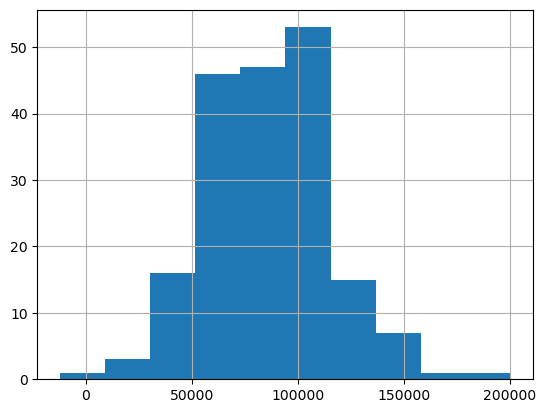

In [13]:
#9. Plot a histogram of AnnualRevenue

df["AnnualRevenue"].hist()

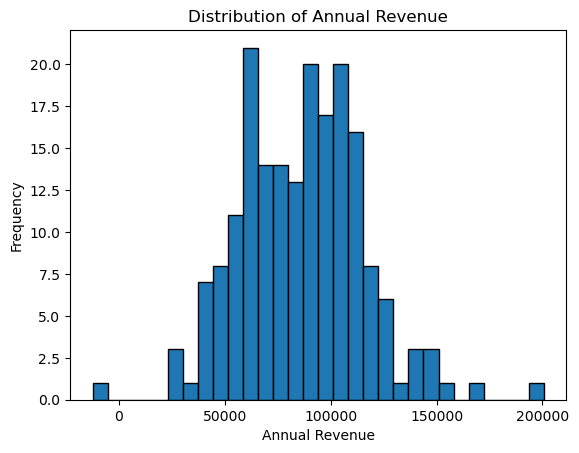

In [16]:
import matplotlib.pyplot as plt

df["AnnualRevenue"].hist(bins=30, edgecolor='black')
plt.title("Distribution of Annual Revenue")
plt.xlabel("Annual Revenue")
plt.ylabel("Frequency")
plt.grid(False)
plt.show()

In [17]:
## Bivariate Analysis

#10. What is the average AnnualRevenue by Region?

df.groupby("Region")["AnnualRevenue"].mean()

Region
Midwest      84393.023182
Northeast    89058.486512
South        86964.835660
West         84992.460200
Name: AnnualRevenue, dtype: float64

In [18]:
#11. Compare TenureMonths for churned vs. non-churned customers

df.groupby("Churned")["TenureMonths"].describe()

,count,mean,std,min,25%,50%,75%,max
Churned,,,,,,,,
0,153.0,26.300654,13.355506,1.0,17.0,28.0,37.0,47.0
1,47.0,20.425532,14.227568,1.0,9.0,19.0,30.0,47.0


In [ ]:
#12. Does average AnnualRevenue differ across ServicePlan?

# Answer based on below is yes!

df.groupby("ServicePlan")["AnnualRevenue"].mean()

ServicePlan
Basic       83909.114426
Premium     84759.713636
Standard    88866.868941
Name: AnnualRevenue, dtype: float64

In [20]:
## Advanced

#13. Create a new column: RevenuePerMonth = AnnualRevenue / TenureMonths

df["RevenuePerMonth"] = df["AnnualRevenue"] / df["TenureMonths"]

In [23]:
#14. Fill missing AnnualRevenue with the mean value for their region

df["AnnualRevenue"] = df["AnnualRevenue"].fillna(df.groupby("Region")["AnnualRevenue"].transform("mean"))

In [24]:
#15. Find the correlation between AnnualRevenue, TenureMonths, and Churned

df[["AnnualRevenue", "TenureMonths", "Churned"]].corr()

,AnnualRevenue,TenureMonths,Churned
AnnualRevenue,1.000000,0.020459,0.028918
TenureMonths,0.020459,1.000000,-0.181522
Churned,0.028918,-0.181522,1.000000


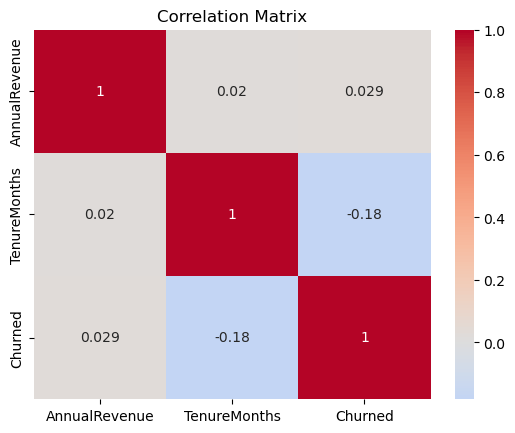

In [26]:
import seaborn as sns

corr = df[["AnnualRevenue", "TenureMonths", "Churned"]].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix")
plt.show()